In [ ]:
BASIC EDA

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from tqdm import tqdm
import nltk
nltk.download('punkt')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [ ]:
NO OF CONTRACTS

In [3]:
folder_path = r"C:\Users\KIIT\Desktop\ClauseAI\DATA\RAW\full_contract_txt"
files = [f for f in os.listdir(folder_path) if f.endswith(".txt")]
len(files)


510

In [ ]:
Loading the files

In [4]:
contract_data = []

for file in tqdm(files):
    file_path = os.path.join(folder_path, file)

    with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
        text = f.read()
        contract_data.append({
            "file_name": file,
            "text": text,
            "char_length": len(text),
            "word_count": len(text.split())
        })

df = pd.DataFrame(contract_data)
df.head()


100%|██████████| 510/510 [00:08<00:00, 59.51it/s]


,file_name,text,char_length,word_count
0,2ThemartComInc_19990826_10-12G_EX-10.10_670028...,CO-BRANDING AND ADVERTISING AGREEMENT\n\nTHIS ...,29454,4467
1,ABILITYINC_06_15_2020-EX-4.25-SERVICES AGREEME...,EXHIBIT 4.25 INFORMATION IN THIS EXHIBIT IDENT...,26346,4115
2,ACCELERATEDTECHNOLOGIESHOLDINGCORP_04_24_2003-...,EXHIBIT 10.13\n\n ...,13038,1911
3,ACCURAYINC_09_01_2010-EX-10.31-DISTRIBUTOR AGR...,Exhibit 10.31 PURSUANT TO 17 C.F.R. § 240.2...,89484,13349
4,ADAMSGOLFINC_03_21_2005-EX-10.17-ENDORSEMENT A...,REDACTED COPY\n\nCONFIDENTIAL TREATMENT REQUES...,24632,3770


In [4]:
df = pd.read_csv(r"C:\Users\KIIT\Desktop\ClauseAI\DATA\RAW\master_clauses.csv")
df.shape




(510, 83)

In [9]:
df = pd.read_csv(r"C:\Users\KIIT\Desktop\ClauseAI\DATA\RAW\master_clauses.csv")
df.columns




Index(['Filename', 'Document Name', 'Document Name-Answer', 'Parties',
       'Parties-Answer', 'Agreement Date', 'Agreement Date-Answer',
       'Effective Date', 'Effective Date-Answer', 'Expiration Date',
       'Expiration Date-Answer', 'Renewal Term', 'Renewal Term-Answer',
       'Notice Period To Terminate Renewal',
       'Notice Period To Terminate Renewal- Answer', 'Governing Law',
       'Governing Law-Answer', 'Most Favored Nation',
       'Most Favored Nation-Answer', 'Competitive Restriction Exception',
       'Competitive Restriction Exception-Answer', 'Non-Compete',
       'Non-Compete-Answer', 'Exclusivity', 'Exclusivity-Answer',
       'No-Solicit Of Customers', 'No-Solicit Of Customers-Answer',
       'No-Solicit Of Employees', 'No-Solicit Of Employees-Answer',
       'Non-Disparagement', 'Non-Disparagement-Answer',
       'Termination For Convenience', 'Termination For Convenience-Answer',
       'Rofr/Rofo/Rofn', 'Rofr/Rofo/Rofn-Answer', 'Change Of Control',
      

In [10]:
df = pd.read_csv(r"C:\Users\KIIT\Desktop\ClauseAI\DATA\RAW\master_clauses.csv")
df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 83 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Filename                                    510 non-null    object
 1   Document Name                               510 non-null    object
 2   Document Name-Answer                        510 non-null    object
 3   Parties                                     510 non-null    object
 4   Parties-Answer                              509 non-null    object
 5   Agreement Date                              510 non-null    object
 6   Agreement Date-Answer                       465 non-null    object
 7   Effective Date                              510 non-null    object
 8   Effective Date-Answer                       359 non-null    object
 9   Expiration Date                             510 non-null    object
 10  Expiration Date-Answer    

,Filename,Document Name,Document Name-Answer,Parties,Parties-Answer,Agreement Date,Agreement Date-Answer,Effective Date,Effective Date-Answer,Expiration Date,...,Liquidated Damages,Liquidated Damages-Answer,Warranty Duration,Warranty Duration-Answer,Insurance,Insurance-Answer,Covenant Not To Sue,Covenant Not To Sue-Answer,Third Party Beneficiary,Third Party Beneficiary-Answer
0,CybergyHoldingsInc_20140520_10-Q_EX-10.27_8605...,['MARKETING AFFILIATE AGREEMENT'],MARKETING AFFILIATE AGREEMENT,"['BIRCH FIRST GLOBAL INVESTMENTS INC.', 'MA', ...","Birch First Global Investments Inc. (""Company""...","['8th day of May 2014', 'May 8, 2014']",5/8/14,['This agreement shall begin upon the date of ...,NaN,['This agreement shall begin upon the date of ...,...,[],No,"[""COMPANY'S SOLE AND EXCLUSIVE LIABILITY FOR T...",Yes,[],No,[],No,[],No
1,EuromediaHoldingsCorp_20070215_10SB12G_EX-10.B...,['VIDEO-ON-DEMAND CONTENT LICENSE AGREEMENT'],VIDEO-ON-DEMAND CONTENT LICENSE AGREEMENT,"['EuroMedia Holdings Corp.', 'Rogers', 'Rogers...","Rogers Cable Communications Inc. (""Rogers""); E...","['July 11 , 2006']",7/11/06,"['July 11 , 2006']",7/11/06,"['The term of this Agreement (the ""Initial Ter...",...,[],No,[],No,[],No,[],No,[],No
2,FulucaiProductionsLtd_20131223_10-Q_EX-10.9_83...,['CONTENT DISTRIBUTION AND LICENSE AGREEMENT'],CONTENT DISTRIBUTION AND LICENSE AGREEMENT,"['Producer', 'Fulucai Productions Ltd.', 'Conv...","CONVERGTV, INC. (“ConvergTV”); Fulucai Product...","['November 15, 2012']",11/15/12,"['November 15, 2012']",11/15/12,[],...,[],No,[],No,[],No,[],No,[],No
3,GopageCorp_20140221_10-K_EX-10.1_8432966_EX-10...,['WEBSITE CONTENT LICENSE AGREEMENT'],WEBSITE CONTENT LICENSE AGREEMENT,"['PSiTech Corporation', 'Licensor', 'Licensee'...","PSiTech Corporation (""Licensor""); Empirical Ve...","['Feb 10, 2014']",2/10/14,"['Feb 10, 2014']",2/10/14,['The initial term of this Agreement commences...,...,[],No,[],No,[],No,[],No,[],No
4,IdeanomicsInc_20160330_10-K_EX-10.26_9512211_E...,['CONTENT LICENSE AGREEMENT'],CONTENT LICENSE AGREEMENT,"['YOU ON DEMAND HOLDINGS, INC.', 'Licensor', '...",Beijing Sun Seven Stars Culture Development Li...,"['December 21, 2015']",12/21/15,"['December 21, 2015']",12/21/15,"['The Term of this Agreement (the ""Term"") shal...",...,[],No,[],No,[],No,[],No,[],No


In [ ]:
#How many documents contain each clause type
df = pd.read_csv(r"C:\Users\KIIT\Desktop\ClauseAI\DATA\RAW\master_clauses.csv")
df.sum(numeric_only=True)


Series([], dtype: float64)

In [12]:
df = pd.read_csv(r"C:\Users\KIIT\Desktop\ClauseAI\DATA\RAW\master_clauses.csv")
df.isnull().sum()


Filename                          0
Document Name                     0
Document Name-Answer              0
Parties                           0
Parties-Answer                    1
                                 ..
Insurance-Answer                  0
Covenant Not To Sue               0
Covenant Not To Sue-Answer        0
Third Party Beneficiary           0
Third Party Beneficiary-Answer    0
Length: 83, dtype: int64

In [ ]:
ADVANCED EDA


In [25]:
# Config - adjust paths & parameters
from pathlib import Path

INPUT_MODE = "folder"   # "folder" or "csv"
RAW_FOLDER = Path("../DATA/RAW")       # adjust relative path from notebook
TRANSFORMED_FOLDER = Path("../TRANSFORMED")
CSV_PATH = RAW_FOLDER / "master_clauses.csv"
CSV_TEXT_COLUMN = "clause_text"       # adjust to actual column name if using csv
SAVE_CLEANED = True
TOP_N_KEYWORDS = 20
MIN_WORDLEN_FOR_KEYWORD = 3           # ignore very short tokens



In [23]:
import pandas as pd

df = pd.read_csv("../DATA/RAW/master_clauses.csv")
df.head()


,Filename,Document Name,Document Name-Answer,Parties,Parties-Answer,Agreement Date,Agreement Date-Answer,Effective Date,Effective Date-Answer,Expiration Date,...,Liquidated Damages,Liquidated Damages-Answer,Warranty Duration,Warranty Duration-Answer,Insurance,Insurance-Answer,Covenant Not To Sue,Covenant Not To Sue-Answer,Third Party Beneficiary,Third Party Beneficiary-Answer
0,CybergyHoldingsInc_20140520_10-Q_EX-10.27_8605...,['MARKETING AFFILIATE AGREEMENT'],MARKETING AFFILIATE AGREEMENT,"['BIRCH FIRST GLOBAL INVESTMENTS INC.', 'MA', ...","Birch First Global Investments Inc. (""Company""...","['8th day of May 2014', 'May 8, 2014']",5/8/14,['This agreement shall begin upon the date of ...,NaN,['This agreement shall begin upon the date of ...,...,[],No,"[""COMPANY'S SOLE AND EXCLUSIVE LIABILITY FOR T...",Yes,[],No,[],No,[],No
1,EuromediaHoldingsCorp_20070215_10SB12G_EX-10.B...,['VIDEO-ON-DEMAND CONTENT LICENSE AGREEMENT'],VIDEO-ON-DEMAND CONTENT LICENSE AGREEMENT,"['EuroMedia Holdings Corp.', 'Rogers', 'Rogers...","Rogers Cable Communications Inc. (""Rogers""); E...","['July 11 , 2006']",7/11/06,"['July 11 , 2006']",7/11/06,"['The term of this Agreement (the ""Initial Ter...",...,[],No,[],No,[],No,[],No,[],No
2,FulucaiProductionsLtd_20131223_10-Q_EX-10.9_83...,['CONTENT DISTRIBUTION AND LICENSE AGREEMENT'],CONTENT DISTRIBUTION AND LICENSE AGREEMENT,"['Producer', 'Fulucai Productions Ltd.', 'Conv...","CONVERGTV, INC. (“ConvergTV”); Fulucai Product...","['November 15, 2012']",11/15/12,"['November 15, 2012']",11/15/12,[],...,[],No,[],No,[],No,[],No,[],No
3,GopageCorp_20140221_10-K_EX-10.1_8432966_EX-10...,['WEBSITE CONTENT LICENSE AGREEMENT'],WEBSITE CONTENT LICENSE AGREEMENT,"['PSiTech Corporation', 'Licensor', 'Licensee'...","PSiTech Corporation (""Licensor""); Empirical Ve...","['Feb 10, 2014']",2/10/14,"['Feb 10, 2014']",2/10/14,['The initial term of this Agreement commences...,...,[],No,[],No,[],No,[],No,[],No
4,IdeanomicsInc_20160330_10-K_EX-10.26_9512211_E...,['CONTENT LICENSE AGREEMENT'],CONTENT LICENSE AGREEMENT,"['YOU ON DEMAND HOLDINGS, INC.', 'Licensor', '...",Beijing Sun Seven Stars Culture Development Li...,"['December 21, 2015']",12/21/15,"['December 21, 2015']",12/21/15,"['The Term of this Agreement (the ""Term"") shal...",...,[],No,[],No,[],No,[],No,[],No


In [28]:
import re
import string
from pathlib import Path
import pandas as pd
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import numpy as np

TRANSFORMED_FOLDER.mkdir(parents=True, exist_ok=True)
sns.set_style("whitegrid")



In [29]:
#File discovery, missing/empty detection

def list_text_files(folder: Path, extensions=(".txt", ".contract", ".md")):
    return sorted([p for p in folder.rglob("*") if p.suffix.lower() in extensions])

def detect_missing_or_empty_files(folder: Path, expected_ids=None):
    files = list_text_files(folder)
    file_map = {p.stem: p for p in files}
    missing = []
    empty = []
    if expected_ids:
        for eid in expected_ids:
            if eid not in file_map:
                missing.append(eid)
            else:
                if file_map[eid].stat().st_size == 0:
                    empty.append(file_map[eid])
    else:
        for p in files:
            if p.stat().st_size == 0:
                empty.append(p)
    return files, missing, empty

# Example usage (for folder mode)
if INPUT_MODE == "folder":
    files, missing, empty_files = detect_missing_or_empty_files(RAW_FOLDER)
    print(f"Found {len(files)} files. Missing expected IDs: {missing}. Empty files: {len(empty_files)}")


Found 510 files. Missing expected IDs: []. Empty files: 0


In [30]:
#Cleaning & normalization functions
CUSTOM_STOPWORDS = {
    "shall","party","agreement","contract","clause","herein","hereby","whereas","said"
}
STOPWORDS = set(ENGLISH_STOP_WORDS).union(CUSTOM_STOPWORDS)

# Core cleaning pipeline
def fix_hyphenation(text: str) -> str:
    # Join hyphenated words broken across lines:
    # e.g. "termi\n  nation" or "termi-\nnation" -> "termination"
    # 1) handle common hyphen then newline
    text = re.sub(r"(\w+)-\s*\n\s*(\w+)", r"\1\2", text)
    # 2) join split words where newline in middle of word (heuristic)
    text = re.sub(r"(\w+)\s*\n\s*(\w+)", r"\1\2", text)
    return text

def remove_page_headers_footers(all_texts: list[str]) -> list[str]:
    """
    Heuristic: find lines that repeat across many files at top/bottom and remove them.
    We'll compute common lines across the corpus and drop lines that appear
    in > threshold percent of documents (likely header/footer).
    """
    # collect first N and last N lines from each doc
    first_lines = []
    last_lines = []
    for t in all_texts:
        lines = [ln.strip() for ln in t.splitlines() if ln.strip()]
        if not lines:
            continue
        first_lines.append(lines[:5])
        last_lines.append(lines[-5:])
    # flatten and count
    candidates = []
    for lst in first_lines + last_lines:
        candidates.extend(lst)
    counts = Counter(candidates)
    n_docs = max(1, len(all_texts))
    # threshold: appears in >30% of docs -> treat as header/footer
    threshold = max(2, int(0.3*n_docs))
    common_lines = {line for line,count in counts.items() if count >= threshold}
    # function to remove any common line
    cleaned_texts = []
    for t in all_texts:
        lines = t.splitlines()
        new_lines = [ln for ln in lines if ln.strip() not in common_lines]
        cleaned_texts.append("\n".join(new_lines))
    return cleaned_texts

def normalize_whitespace(text: str) -> str:
    text = text.replace("\t", " ")
    # collapse multiple spaces
    text = re.sub(r"[ ]{2,}", " ", text)
    # collapse repeated line breaks to single blank line
    text = re.sub(r"\n{3,}", "\n\n", text)
    # strip trailing spaces on lines
    text = "\n".join([ln.rstrip() for ln in text.splitlines()])
    return text.strip()

# remove noisy characters but keep punctuation relevant to legal text (.,;:)
def remove_noisy_chars(text: str) -> str:
    # remove non-ASCII except typical punctuation and currency symbols
    text = re.sub(r"[^\x00-\x7F]", " ", text)
    # remove bulleted characters like •, — etc (already removed by above)
    # remove weird repeated control-chars
    text = re.sub(r"[\x00-\x1F]+", " ", text)
    return text

def preserve_section_headers(text: str):
    """
    We want to keep headers like "TERMINATION", "CONFIDENTIALITY".
    Those typically appear as lines that are all-caps and short-ish.
    We'll mark them with a token to preserve through lowercasing.
    """
    lines = text.splitlines()
    header_mask = []
    for ln in lines:
        stripped = ln.strip()
        # treat as header if >2 chars, mostly uppercase letters and maybe spaces/digits
        if len(stripped) > 2 and re.match(r"^[A-Z0-9 \-,:]{3,}$", stripped) and (sum(1 for c in stripped if c.isalpha())/max(1,len(stripped)) > 0.5):
            header_mask.append(True)
            # surround header with special markers to preserve them
            lines[lines.index(ln)] = f"__HEADER__{stripped}__HEADER__"
        else:
            header_mask.append(False)
    return "\n".join(lines)

def restore_headers_and_case(text: str, original_text: str):
    # If header markers present, replace them with the original uppercase forms
    def repl(m):
        content = m.group(1)
        return content.upper()
    text = re.sub(r"__HEADER__(.*?)__HEADER__", repl, text)
    return text

def standardize_case(text: str, keep_original_headers=True):
    # convert to lower case but keep header markers
    if keep_original_headers:
        # assume headers are marked already
        text_lower = text.lower()
        # but restore headers
        text_lower = re.sub(r"__header__(.*?)__header__", lambda m: m.group(1).upper(), text_lower, flags=re.DOTALL)
        return text_lower
    else:
        return text.lower()

def clean_single_text(text: str) -> str:
    if not isinstance(text, str):
        return ""
    # 1. normalize line endings
    text = text.replace("\r\n", "\n").replace("\r", "\n")
    # 2. fix hyphenation across lines
    text = fix_hyphenation(text)
    # 3. remove noisy chars
    text = remove_noisy_chars(text)
    # 4. preserve headers by marking them
    text = preserve_section_headers(text)
    # 5. normalize whitespace & repeated newlines
    text = normalize_whitespace(text)
    # 6. standardize case while keeping headers upper if marked
    text = standardize_case(text, keep_original_headers=True)
    # 7. final whitespace collapse
    text = normalize_whitespace(text)
    # restore header markers formatted correctly
    text = re.sub(r"__HEADER__(.*?)__HEADER__", lambda m: m.group(1).upper(), text)
    return text


In [31]:
def batch_clean_folder(folder: Path, out_folder: Path, save=True):
    files = list_text_files(folder)
    report = []
    raw_texts = []
    ids = []
    for p in files:
        txt = p.read_text(encoding="utf-8", errors="ignore")
        raw_texts.append(txt)
        ids.append(p.stem)
    # remove repeated headers/footers across corpus
    cleaned_after_header_removal = remove_page_headers_footers(raw_texts)
    for idx, (orig_text, global_cleaned_text, doc_id) in enumerate(zip(raw_texts, cleaned_after_header_removal, ids)):
        clean_text = clean_single_text(global_cleaned_text)
        out_path = out_folder / f"{doc_id}_cleaned.txt"
        if save:
            out_path.write_text(clean_text, encoding="utf-8")
        # simple stats
        word_count = len([t for t in re.findall(r"\b\w+\b", clean_text)])
        char_count = len(clean_text)
        report.append({"doc_id": doc_id, "words": word_count, "chars": char_count, "path": str(out_path)})
    return pd.DataFrame(report)

if INPUT_MODE == "folder":
    stats_df = batch_clean_folder(RAW_FOLDER, TRANSFORMED_FOLDER, save=SAVE_CLEANED)
    print("Saved cleaned files to:", TRANSFORMED_FOLDER)
    stats_df.head()


Saved cleaned files to: ..\TRANSFORMED


In [32]:
#Count words per contract & most frequent legal terms
def load_cleaned_texts(folder: Path):
    files = list_text_files(folder)
    docs = []
    ids = []
    for p in files:
        ids.append(p.stem.replace("_cleaned",""))
        docs.append(p.read_text(encoding="utf-8", errors="ignore"))
    return ids, docs

ids, docs = load_cleaned_texts(TRANSFORMED_FOLDER)
print("Cleaned docs:", len(docs))

def tokenize(text: str, min_wordlen=MIN_WORDLEN_FOR_KEYWORD):
    tokens = re.findall(r"\b[a-zA-Z]{%d,}\b" % min_wordlen, text.lower())
    return [t for t in tokens if t not in STOPWORDS]

# word counts per document
word_counts = {doc_id: len(re.findall(r"\b\w+\b", doc_text)) for doc_id, doc_text in zip(ids, docs)}
word_counts_df = pd.DataFrame.from_dict(word_counts, orient="index", columns=["word_count"]).reset_index().rename(columns={"index":"doc_id"})
word_counts_df = word_counts_df.sort_values("word_count", ascending=False)
word_counts_df.head()

# global top keywords
all_tokens = []
for text in docs:
    all_tokens.extend(tokenize(text))
global_freq = Counter(all_tokens)
top_keywords = global_freq.most_common(TOP_N_KEYWORDS)
print("Top keywords:", top_keywords)


Cleaned docs: 510
Top keywords: [('parties', 13475), ('section', 12848), ('company', 12562), ('information', 10865), ('product', 10851), ('date', 10072), ('including', 9900), ('time', 9429), ('use', 8893), ('provided', 8212), ('products', 8144), ('rights', 7996), ('services', 7769), ('applicable', 7529), ('business', 7308), ('set', 7049), ('written', 6793), ('right', 6680), ('terms', 6660), ('notice', 6614)]


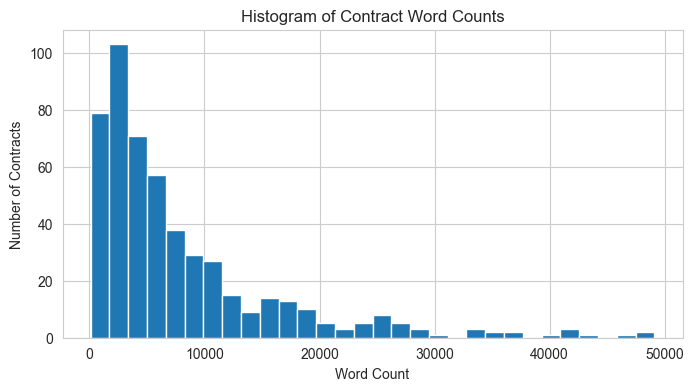

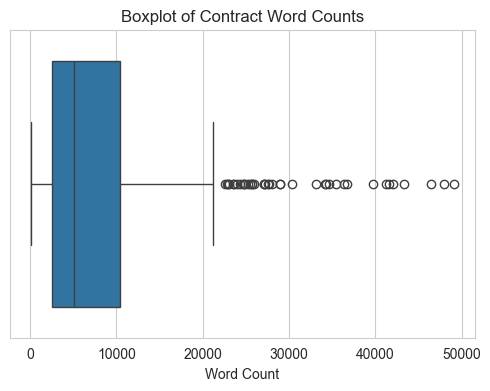

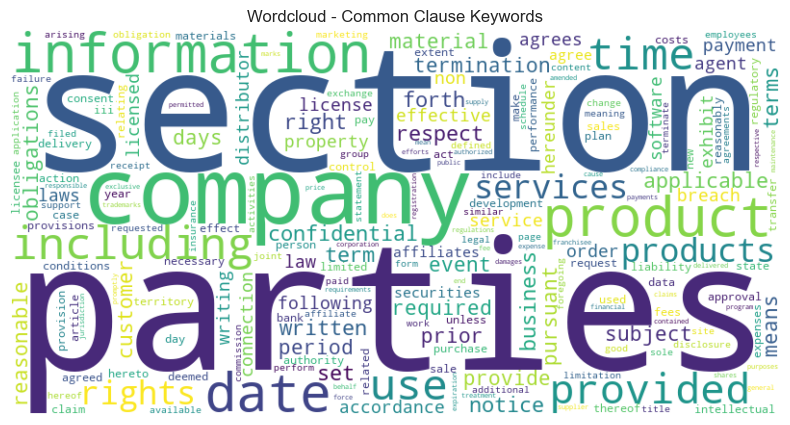

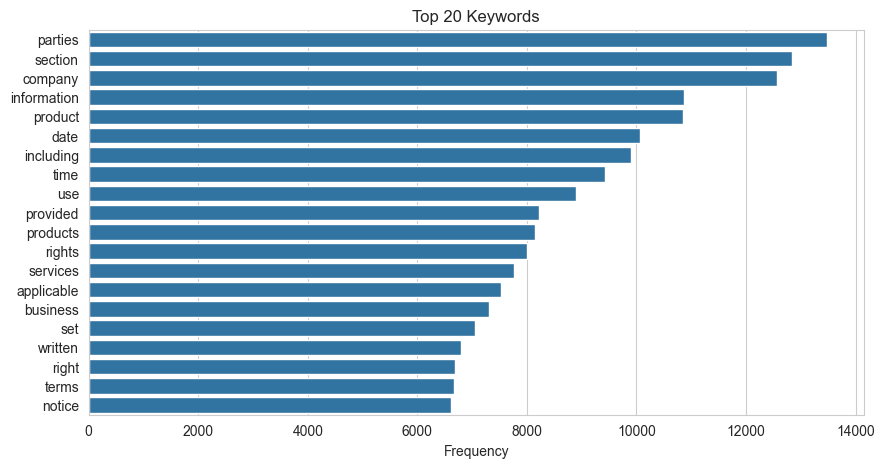

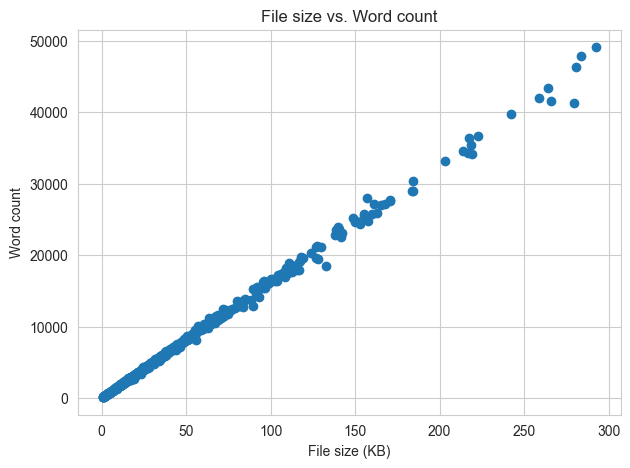

In [33]:
#Visualizations
# Prepare arrays
word_counts_arr = np.array(list(word_counts.values()))

# Histogram – contract length (word counts)
plt.figure(figsize=(8,4))
plt.hist(word_counts_arr, bins=30)
plt.title("Histogram of Contract Word Counts")
plt.xlabel("Word Count")
plt.ylabel("Number of Contracts")
plt.show()

# Boxplot – text length distribution
plt.figure(figsize=(6,4))
sns.boxplot(x=word_counts_arr)
plt.title("Boxplot of Contract Word Counts")
plt.xlabel("Word Count")
plt.show()

# Wordcloud – common clause keywords
wc = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(global_freq)
plt.figure(figsize=(12,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud - Common Clause Keywords")
plt.show()

# Bar chart – top N keywords
top_n = TOP_N_KEYWORDS
kws, counts = zip(*global_freq.most_common(top_n))
plt.figure(figsize=(10,5))
sns.barplot(x=list(counts), y=list(kws))
plt.xlabel("Frequency")
plt.title(f"Top {top_n} Keywords")
plt.show()

# Scatter – file size vs. word count
sizes_in_kb = []
for p in list_text_files(TRANSFORMED_FOLDER):
    sizes_in_kb.append(p.stat().st_size/1024)
# align order (files list)
doc_ids = [p.stem.replace("_cleaned","") for p in list_text_files(TRANSFORMED_FOLDER)]
word_counts_for_files = [word_counts.get(did, 0) for did in doc_ids]
plt.figure(figsize=(7,5))
plt.scatter(sizes_in_kb, word_counts_for_files)
plt.xlabel("File size (KB)")
plt.ylabel("Word count")
plt.title("File size vs. Word count")
plt.show()


In [ ]:
'''Histogram
1. most contracts are short
2. long contracts are rare
3. data is not symmetric 
4. bars beyond 40,000–50,000 words indicate outliers

BOXPLOT
1.Contracts have very high variability in length
2.A large cluster of outliers between 15,000 and 35,000 words. A few extreme outliers around 40,000–50,000 words

WORDCLOUD
Words like “parties”, “section”, “company”, “information”, “product”, “services” appear very large, showing they occur across almost all contracts.

TOP 20 KEYWORDS
Most frequent keywords like parties, section, company, information, product show contracts focus heavily on defining involved entities, structure, and deliverables.
High counts of terms like rights, applicable, notice, written, period indicate strong emphasis on legal obligations, timelines, and compliance.

SCATTERPLOT
File size and word count have a strong linear relationship, meaning your contracts are clean and consistently formatted.
There are no major outliers, so no corrupted, empty, or unusually noisy files.


In [34]:
# Save stats DataFrame
stats_out = TRANSFORMED_FOLDER / "cleaning_stats.csv"
stats_df = pd.DataFrame([
    {"doc_id": doc_id, "word_count": word_counts.get(doc_id,0), "chars": len(docs[i]), "path": str(list_text_files(TRANSFORMED_FOLDER)[i])}
    for i, doc_id in enumerate(doc_ids)
])
stats_df.to_csv(stats_out, index=False)
print("Saved stats to", stats_out)

# top keywords to CSV
pd.DataFrame(top_keywords, columns=["keyword","freq"]).to_csv(TRANSFORMED_FOLDER / f"top_{TOP_N_KEYWORDS}_keywords.csv", index=False)


Saved stats to ..\TRANSFORMED\cleaning_stats.csv


In [35]:
# Run the whole pipeline (folder mode)
if INPUT_MODE == "folder":
    # 1) detect empties
    files, missing, empty_files = detect_missing_or_empty_files(RAW_FOLDER)
    print("Found files:", len(files), "Empty files:", len(empty_files))
    # 2) clean & save
    stats_df = batch_clean_folder(RAW_FOLDER, TRANSFORMED_FOLDER, save=SAVE_CLEANED)
    print("Cleaned files saved:", len(stats_df))
    # 3) gather keywords & stats
    ids, docs = load_cleaned_texts(TRANSFORMED_FOLDER)
    word_counts = {doc_id: len(re.findall(r"\b\w+\b", doc_text)) for doc_id, doc_text in zip(ids, docs)}
    all_tokens = []
    for text in docs: all_tokens.extend(tokenize(text))
    global_freq = Counter(all_tokens)
    print("Top keywords:", global_freq.most_common(10))
    # 4) run visualizations from the previous cell (or call a function)


Found files: 510 Empty files: 0
Cleaned files saved: 510
Top keywords: [('parties', 13475), ('section', 12848), ('company', 12562), ('information', 10865), ('product', 10851), ('date', 10072), ('including', 9900), ('time', 9429), ('use', 8893), ('provided', 8212)]


Saved 83 chunks → contract_001_chunks.json
Saved 106 chunks → contract_002_chunks.json
Saved 20 chunks → contract_003_chunks.json
Saved 20 chunks → contract_004_chunks.json
Saved 2 chunks → contract_005_chunks.json
Saved 33 chunks → contract_006_chunks.json
Saved 23 chunks → contract_007_chunks.json
Saved 12 chunks → contract_008_chunks.json
Saved 259 chunks → contract_009_chunks.json
Saved 219 chunks → contract_010_chunks.json
Saved 171 chunks → contract_011_chunks.json
Saved 65 chunks → contract_012_chunks.json
Saved 19 chunks → contract_013_chunks.json
Saved 11 chunks → contract_014_chunks.json
Saved 94 chunks → contract_015_chunks.json
Saved 6 chunks → contract_016_chunks.json
Saved 97 chunks → contract_017_chunks.json
Saved 42 chunks → contract_018_chunks.json
Saved 33 chunks → contract_019_chunks.json
Saved 14 chunks → contract_020_chunks.json
Saved 75 chunks → contract_021_chunks.json
Saved 245 chunks → contract_022_chunks.json
Saved 83 chunks → contract_023_chunks.json
Saved 11

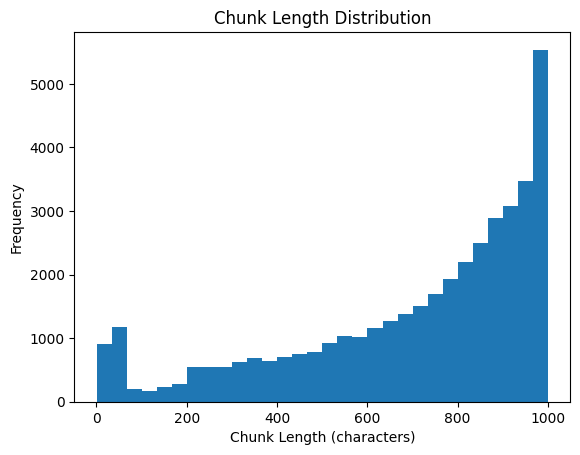

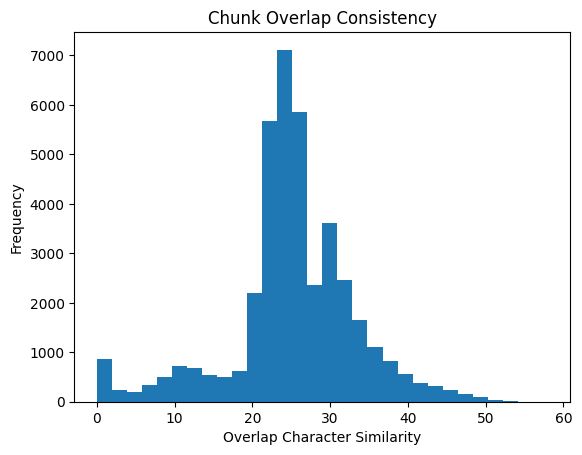

In [ ]:

# 1. IMPORTS & PATHS

from pathlib import Path
import json
import matplotlib.pyplot as plt
from langchain_text_splitters import RecursiveCharacterTextSplitter


BASE_DIR = Path.cwd().parent          # NOTEBOOK → ClauseAI
RAW_DIR = BASE_DIR / "DATA" / "RAW"
CHUNKS_DIR = BASE_DIR / "dataset" / "chunks"

CHUNKS_DIR.mkdir(parents=True, exist_ok=True)

CUAD_FILE = RAW_DIR / "CUAD_v1.json"


# 2. LOAD CUAD DATASET

with open(CUAD_FILE, "r", encoding="utf-8") as f:
    cuad = json.load(f)

contracts = cuad["data"]



# 3. CHUNKING FUNCTION (Sentence-aware + Overlap)

def chunk_text(text, chunk_size=1000, chunk_overlap=200):
    splitter = RecursiveCharacterTextSplitter(
        chunk_size=chunk_size,
        chunk_overlap=chunk_overlap,
        separators=["\n\n", "\n", ". ", " "]
    )
    return splitter.split_text(text)



# 4. PROCESS ALL CONTRACTS & SAVE PER-CONTRACT FILES

all_chunk_lengths = []
all_overlaps = []

for idx, contract in enumerate(contracts, start=1):
    contract_id = f"{idx:03d}"
    title = contract.get("title", f"contract_{contract_id}")
    context = contract["paragraphs"][0]["context"]

    chunks = chunk_text(context)

    chunk_records = []
    prev_chunk = ""

    for i, chunk in enumerate(chunks):
        chunk_records.append({
            "contract_id": contract_id,
            "contract_title": title,
            "chunk_id": i,
            "text": chunk
        })

        all_chunk_lengths.append(len(chunk))

        if prev_chunk:
            overlap = len(set(prev_chunk[-200:]) & set(chunk[:200]))
            all_overlaps.append(overlap)

        prev_chunk = chunk

    out_file = CHUNKS_DIR / f"contract_{contract_id}_chunks.json"
    with open(out_file, "w", encoding="utf-8") as f:
        json.dump(chunk_records, f, indent=2)

    print(f"Saved {len(chunk_records)} chunks → {out_file.name}")



# 5. PREVIEW ONE CHUNK FILE

sample_file = CHUNKS_DIR / "contract_001_chunks.json"

with open(sample_file, "r", encoding="utf-8") as f:
    sample_chunks = json.load(f)

print("Total chunks:", len(sample_chunks))
print("\nFirst chunk preview:\n")
print(sample_chunks[0]["text"][:500])



# 6. VISUALIZATION: CHUNK LENGTH DISTRIBUTION

plt.figure()
plt.hist(all_chunk_lengths, bins=30)
plt.xlabel("Chunk Length (characters)")
plt.ylabel("Frequency")
plt.title("Chunk Length Distribution")
plt.show()



# 7. VISUALIZATION: OVERLAP CHECK

plt.figure()
plt.hist(all_overlaps, bins=30)
plt.xlabel("Overlap Character Similarity")
plt.ylabel("Frequency")
plt.title("Chunk Overlap Consistency")
plt.show()


In [27]:
#CHUNK EMBEDDING AND VECTOR NORMALISATION


c:\Users\KIIT\Desktop\ClauseAI\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\KIIT\Desktop\ClauseAI\env\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\KIIT\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to

Saved embeddings → contract_001_embeddings.json
Saved embeddings → contract_002_embeddings.json
Saved embeddings → contract_003_embeddings.json
Saved embeddings → contract_004_embeddings.json
Saved embeddings → contract_005_embeddings.json
Saved embeddings → contract_006_embeddings.json
Saved embeddings → contract_007_embeddings.json
Saved embeddings → contract_008_embeddings.json
Saved embeddings → contract_009_embeddings.json
Saved embeddings → contract_010_embeddings.json
Saved embeddings → contract_011_embeddings.json
Saved embeddings → contract_012_embeddings.json
Saved embeddings → contract_013_embeddings.json
Saved embeddings → contract_014_embeddings.json
Saved embeddings → contract_015_embeddings.json
Saved embeddings → contract_016_embeddings.json
Saved embeddings → contract_017_embeddings.json
Saved embeddings → contract_018_embeddings.json
Saved embeddings → contract_019_embeddings.json
Saved embeddings → contract_020_embeddings.json
Total embeddings: 83
Vector length: 384


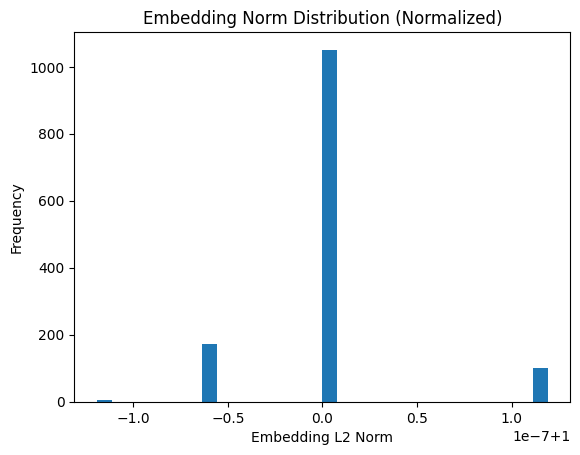

Cosine Similarity: 0.6204950840474193
Dot Product: 0.6204951597102055


In [29]:

# 1. IMPORTS & PATHS

import json
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

BASE_DIR = Path.cwd().parent          # NOTEBOOK → ClauseAI
CHUNKS_DIR = BASE_DIR / "dataset" / "chunks"
EMB_DIR = BASE_DIR / "dataset" / "embeddings"
EMB_DIR.mkdir(parents=True, exist_ok=True)



# 2. EMBEDDING MODEL & FUNCTION

model = SentenceTransformer("all-MiniLM-L6-v2")

def embed_texts(texts):
    embeddings = model.encode(texts, normalize_embeddings=True)
    return embeddings



# 3. PROCESS ALL CHUNKS (FIRST 20 FILES)

chunk_files = sorted(CHUNKS_DIR.glob("contract_*_chunks.json"))[:20]

all_norms = []

for chunk_file in chunk_files:
    with open(chunk_file, "r", encoding="utf-8") as f:
        chunks = json.load(f)

    texts = [c["text"] for c in chunks]
    embeddings = embed_texts(texts)

    emb_records = []
    for i, emb in enumerate(embeddings):
        norm = float(np.linalg.norm(emb))
        all_norms.append(norm)

        emb_records.append({
            "contract_id": chunks[i]["contract_id"],
            "chunk_id": chunks[i]["chunk_id"],
            "embedding": emb.tolist()
        })

    out_file = EMB_DIR / chunk_file.name.replace("_chunks", "_embeddings")
    with open(out_file, "w", encoding="utf-8") as f:
        json.dump(emb_records, f)

    print(f"Saved embeddings → {out_file.name}")



# 4. PREVIEW ONE EMBEDDING FILE

sample_emb_file = sorted(EMB_DIR.glob("contract_*_embeddings.json"))[0]

with open(sample_emb_file, "r", encoding="utf-8") as f:
    sample_embs = json.load(f)

print("Total embeddings:", len(sample_embs))
print("Vector length:", len(sample_embs[0]["embedding"]))



# 5. VECTOR LENGTH CHECK

lengths = {len(e["embedding"]) for e in sample_embs}
print("Unique embedding dimensions:", lengths)



# 6. VISUALIZATION: EMBEDDING NORM DISTRIBUTION

plt.figure()
plt.hist(all_norms, bins=30)
plt.xlabel("Embedding L2 Norm")
plt.ylabel("Frequency")
plt.title("Embedding Norm Distribution (Normalized)")
plt.show()



# 7. SANITY CHECK: SIMILARITY

v1 = np.array(sample_embs[0]["embedding"])
v2 = np.array(sample_embs[1]["embedding"])

cos_sim = cosine_similarity([v1], [v2])[0][0]
dot_sim = float(np.dot(v1, v2))

print("Cosine Similarity:", cos_sim)
print("Dot Product:", dot_sim)
